In [1]:

#Importing all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #Jaccard
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import seaborn as sns


In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0489dff7d6ef4e0e91a361446cf75e57 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TngQD2dcGwkuWf1YF_E_E7O_31MLXStcAyo0k7SplcHU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0489dff7d6ef4e0e91a361446cf75e57.get_object(Bucket='roadseverityaccidentproject-donotdelete-pr-cgt2hl4uuunnxu',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:

#Label Encoding and preprocessing inorder to convert categorical values to integer type for preprocessing
df=df[df['STATUS']!='Unmatched']
df['SPEEDING'].fillna("N",inplace=True)
df["INATTENTIONIND"].fillna("N",inplace=True)
df["INTKEY"].fillna(method='ffill',inplace=True)
df['X'].fillna(method='ffill',inplace=True)
df['Y'].fillna(method='ffill',inplace=True)
df['LOCATION'].fillna(method='ffill',inplace=True)
df['LOCATION_NUM']=LabelEncoder().fit_transform(df['LOCATION'].astype(str))
df['ROADCOND_NUM']=LabelEncoder().fit_transform(df['ROADCOND'].astype(str))
df['WEATHER_NUM']=LabelEncoder().fit_transform(df['WEATHER'].astype(str))
df['LIGHTCOND_NUM']=LabelEncoder().fit_transform(df['LIGHTCOND'].astype(str))
df['SPEEDING_NUM']=LabelEncoder().fit_transform(df['SPEEDING'].astype(str))
df['COLLISION_NUM']=LabelEncoder().fit_transform(df['COLLISIONTYPE'].astype(str))
#Under influence start
df['UNDERINFL'].replace("N",int(0),inplace=True)
df['UNDERINFL'].replace("Y",int(1),inplace=True)
#Under influence end
#Inattention ID start
df["INATTENTIONIND"].replace("N",0,inplace=True)
df["INATTENTIONIND"].replace("Y",1,inplace=True)
#Inattention ID stop
df["UNDERINFL"]=df["UNDERINFL"].astype(int)
#print(df.dtypes)
print(df.corr()['SEVERITYCODE'].sort_values())#Correlation
data=df[['SEVERITYCODE','WEATHER_NUM','INATTENTIONIND','ROADCOND_NUM','LIGHTCOND_NUM','VEHCOUNT','SPEEDING_NUM','COLLISION_NUM','UNDERINFL']]


COLLISION_NUM    -0.128429
WEATHER_NUM      -0.110431
VEHCOUNT         -0.080807
LIGHTCOND_NUM    -0.061206
ROADCOND_NUM     -0.049446
LOCATION_NUM     -0.038109
INTKEY            0.000809
SDOTCOLNUM        0.004528
X                 0.010459
Y                 0.017944
OBJECTID          0.026527
INCKEY            0.029442
COLDETKEY         0.029465
SPEEDING_NUM      0.038249
UNDERINFL         0.043761
INATTENTIONIND    0.044839
SEGLANEKEY        0.104412
PERSONCOUNT       0.129782
CROSSWALKKEY      0.175533
SDOT_COLCODE      0.186127
PEDCYLCOUNT       0.215718
PEDCOUNT          0.248121
SEVERITYCODE.1    1.000000
SEVERITYCODE      1.000000
Name: SEVERITYCODE, dtype: float64


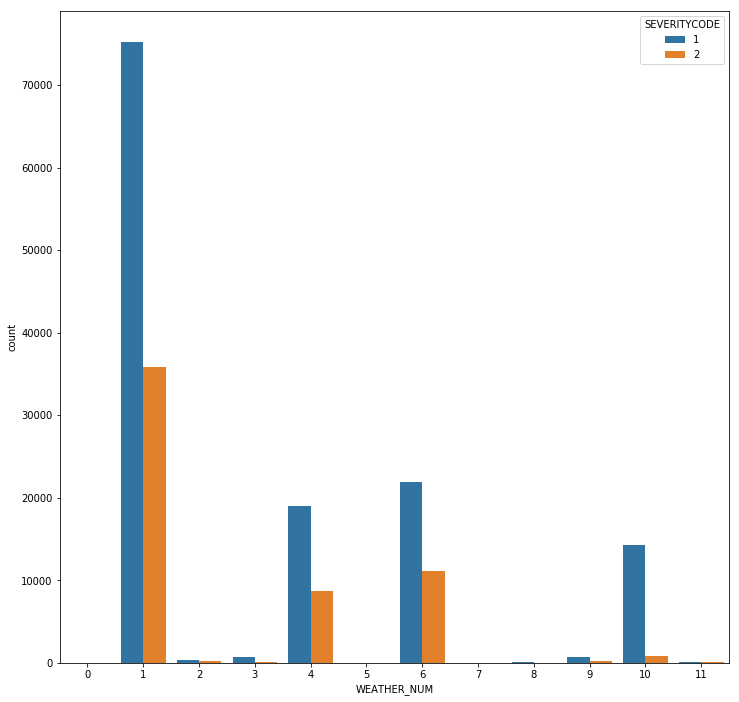

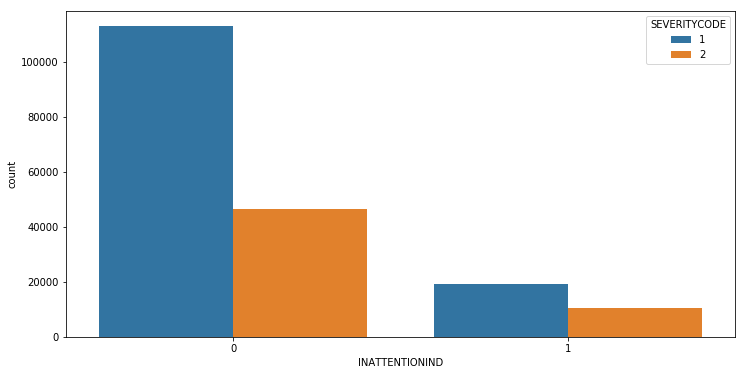

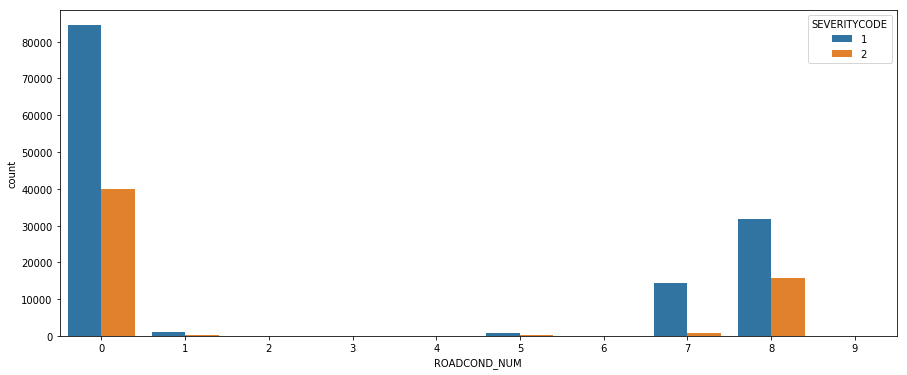

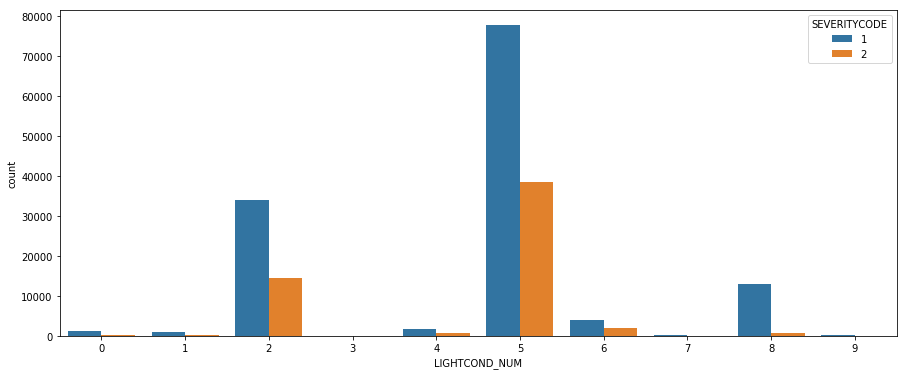

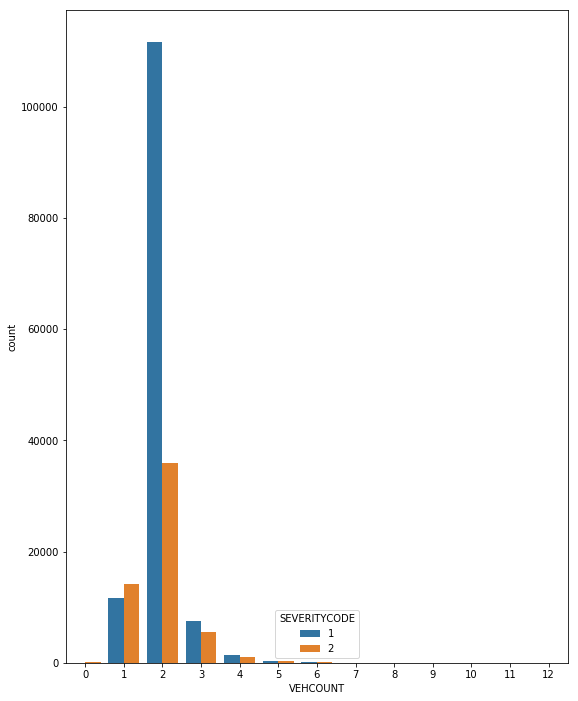

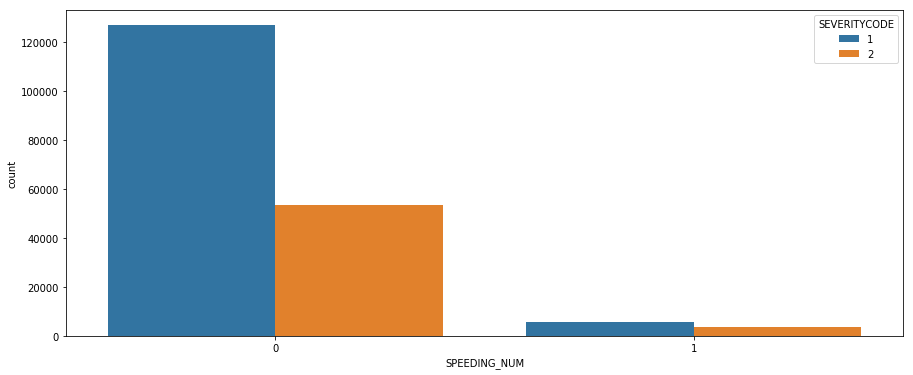

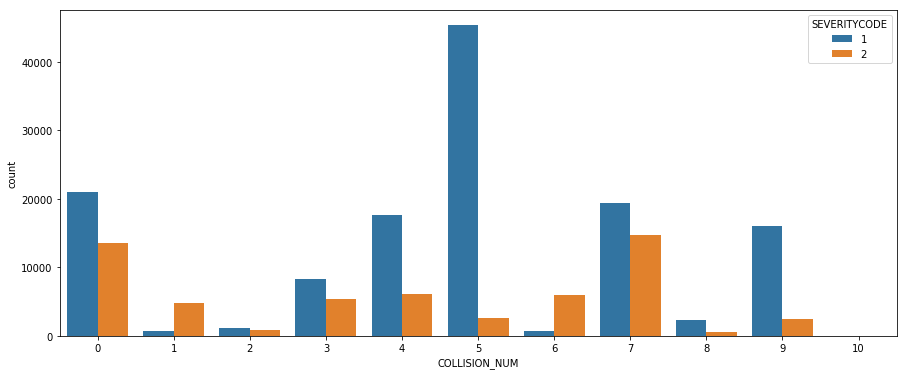

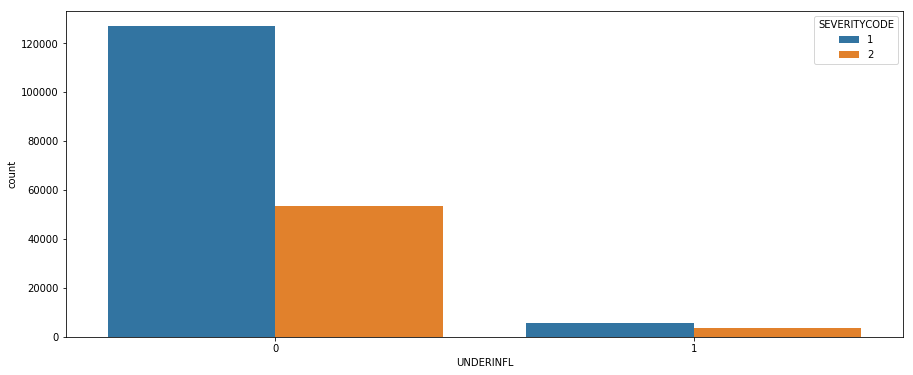

In [4]:
#The histogram plot for how each feature variable affects the target variable
plt.figure(figsize=(12, 12))
ax = sns.countplot(x="WEATHER_NUM", hue="SEVERITYCODE", data=data)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="INATTENTIONIND", hue="SEVERITYCODE", data=data)
plt.figure(figsize=(15, 6))
ax = sns.countplot(x="ROADCOND_NUM", hue="SEVERITYCODE", data=data)
plt.figure(figsize=(15, 6))
ax = sns.countplot(x="LIGHTCOND_NUM", hue="SEVERITYCODE", data=data)
plt.figure(figsize=(9, 12))
ax = sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=data)
plt.figure(figsize=(15, 6))
ax = sns.countplot(x="SPEEDING_NUM", hue="SEVERITYCODE", data=data)
plt.figure(figsize=(15, 6))
ax = sns.countplot(x="COLLISION_NUM", hue="SEVERITYCODE", data=data)
plt.figure(figsize=(15, 6))
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=data)


In [5]:
#Resampling inorder to make the target value balanced or to balance the overall dataset
data['SEVERITYCODE'].value_counts()
df_maj=data[data['SEVERITYCODE']==1]
df_min=data[data['SEVERITYCODE']==2]
sample_maj=resample(df_maj,replace=False,n_samples=len(df_min.iloc[:,0]),random_state=4)
balance=pd.concat([sample_maj,df_min])
balance.reset_index(inplace=True)
balance.drop(columns=['index'],inplace=True)


In [6]:

#Defining Features and target values and splitting data to train and test
y=balance['SEVERITYCODE'].values
X=np.asarray(balance[['WEATHER_NUM','INATTENTIONIND','ROADCOND_NUM','LIGHTCOND_NUM','VEHCOUNT','SPEEDING_NUM','COLLISION_NUM','UNDERINFL']])
X=preprocessing.StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:

# K-Nearest Neighbors
"""for k in range(1, 21):
    knn_model  = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    print("For K = {} accuracy = {}".format(k,accuracy_score(y_test,knn_yhat)))
#k=19"""
best_knn_model = KNeighborsClassifier(n_neighbors = 19).fit(X_train, y_train)
yh_knn=best_knn_model.predict(X_test)
print("KNN Jaccard Accuracy {}".format(accuracy_score(y_test,yh_knn)))
print("KNN F1 Accuracy {}".format(f1_score(y_test,yh_knn,average='weighted')))


KNN Jaccard Accuracy 0.7049510146955913
KNN F1 Accuracy 0.703471937432703


In [8]:

# Decision Tree
"""for d in range(1,31):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    print("For depth = {}  the accuracy score is {} ".format(d, accuracy_score(y_test, dt_yhat)))
#d=7"""
best_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7).fit(X_train, y_train)
yh_dt=best_dt_model.predict(X_test)
print("Decision Tree Jaccard Accuracy {}".format(accuracy_score(y_test,yh_dt)))
print("Decision Tree F1 Accuracy {}".format(f1_score(y_test,yh_dt,average='weighted')))


Decision Tree Jaccard Accuracy 0.7150104968509448
Decision Tree F1 Accuracy 0.7117671067658082


In [9]:

#Logistic Regression
"""for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    lr_yhat = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test) #used for log loss only
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))
#saga"""
best_lr_model = LogisticRegression(C = 0.01, solver = 'saga').fit(X_train, y_train)
yh_lr=best_lr_model.predict(X_test)
yh_proba=best_lr_model.predict_proba(X_test)
print("Logistic Regression Jaccard Accuracy {}".format(accuracy_score(y_test,yh_lr)))
print("Logistic Regression F1 Accuracy {}".format(f1_score(y_test,yh_lr)))
print("Logistic Regression Log Loss Accuracy {}".format(log_loss(y_test,yh_proba)))


Logistic Regression Jaccard Accuracy 0.593334499650105
Logistic Regression F1 Accuracy 0.576323703636198
Logistic Regression Log Loss Accuracy 0.6691868872175821


In [10]:

df=pd.DataFrame({'KNN':[precision_score(y_test,yh_knn),recall_score(y_test,yh_knn),accuracy_score(y_test,yh_knn),f1_score(y_test,yh_knn,average='weighted'),'NA'],'DT':[precision_score(y_test,yh_dt),recall_score(y_test,yh_dt),accuracy_score(y_test,yh_dt),f1_score(y_test,yh_dt,average='weighted'),'NA'],'LR':[precision_score(y_test,yh_lr),recall_score(y_test,yh_lr),accuracy_score(y_test,yh_lr),f1_score(y_test,yh_lr), log_loss(y_test,yh_proba)]},index=['Precision','Recall','Jaccard','F1 score','Log loss'])
df



,KNN,DT,LR
Precision,0.729608,0.762942,0.591249
Recall,0.636089,0.610489,0.562133
Jaccard,0.704951,0.71501,0.593334
F1 score,0.703472,0.711767,0.576324
Log loss,NA,NA,0.669187


In [11]:
print("                'K-Nearest Neighbors'              ")
print(classification_report(y_test,yh_knn))
print("/n")
print("                'Decision Tress'              ")
print(classification_report(y_test,yh_dt))
print("/n")
print("                'Logistic Regression'              ")
print(classification_report(y_test,yh_lr))

                'K-Nearest Neighbors'              
              precision    recall  f1-score   support

           1       0.73      0.64      0.68      5625
           2       0.69      0.77      0.73      5807

   micro avg       0.70      0.70      0.70     11432
   macro avg       0.71      0.70      0.70     11432
weighted avg       0.71      0.70      0.70     11432

/n
                'Decision Tress'              
              precision    recall  f1-score   support

           1       0.76      0.61      0.68      5625
           2       0.68      0.82      0.74      5807

   micro avg       0.72      0.72      0.72     11432
   macro avg       0.72      0.71      0.71     11432
weighted avg       0.72      0.72      0.71     11432

/n
                'Logistic Regression'              
              precision    recall  f1-score   support

           1       0.59      0.56      0.58      5625
           2       0.60      0.62      0.61      5807

   micro avg       0.59  

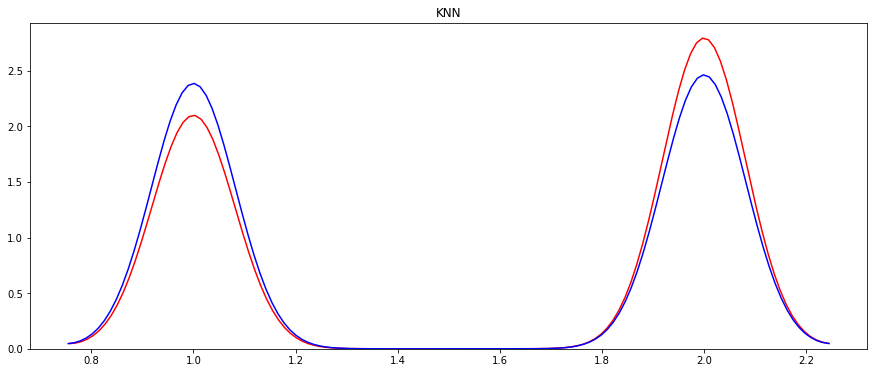

<Figure size 1080x432 with 0 Axes>

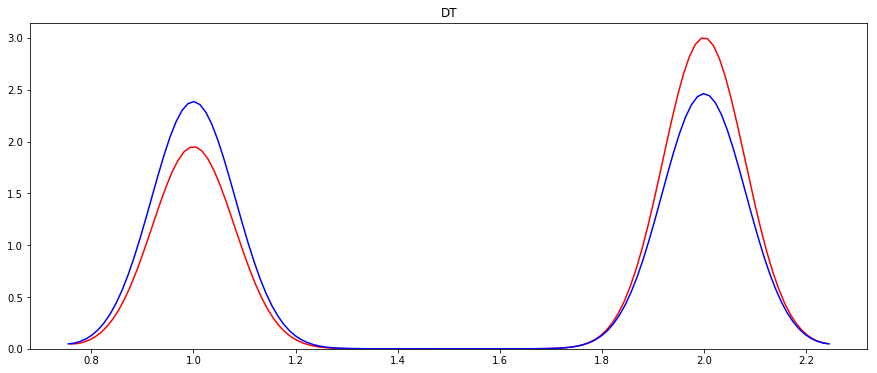

<Figure size 1080x432 with 0 Axes>

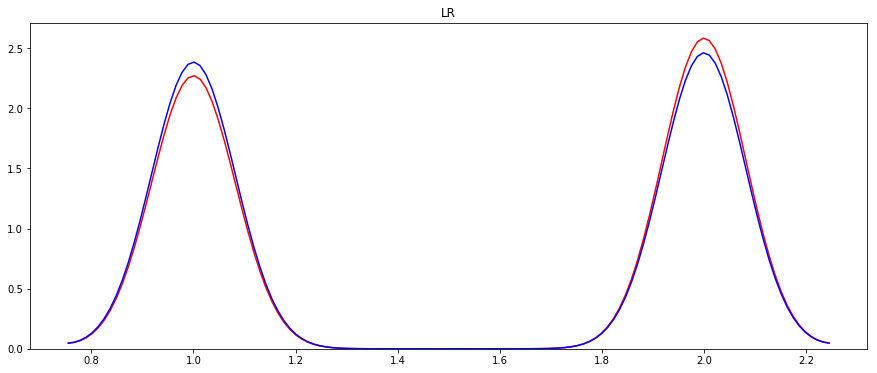

<Figure size 1080x432 with 0 Axes>

In [12]:
plt.figure(figsize=(15, 6))
plt.title("KNN")
ax1 = sns.distplot(yh_knn,color='r',hist=False)
plt.figure(figsize=(15, 6))
sns.distplot(y_test,hist=False,color='b',ax=ax1)
plt.show()

plt.figure(figsize=(15, 6))
plt.title("DT")
ax2 = sns.distplot(yh_dt,color='r',hist=False)
plt.figure(figsize=(15, 6))
sns.distplot(y_test,hist=False,color='b',ax=ax2)
plt.show()

plt.figure(figsize=(15, 6))
plt.title("LR")
ax3 = sns.distplot(yh_lr,color='r',hist=False)
plt.figure(figsize=(15, 6))
sns.distplot(y_test,hist=False,color='b',ax=ax3)
plt.show()